In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [2]:
import pandas as pd
df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

In [3]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [4]:
df.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [5]:
df.sort_values("Year", ascending=True)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.0,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.0,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.0,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.0,0.00,0.01


In [6]:
df['Year'].isna().sum()

271

In [7]:
df['Publisher'].isna().sum()

58

In [8]:
without_nan = df.dropna(subset=['Year'], axis=0, inplace = False)

In [9]:
without_nan

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [10]:
without_nan.isna().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [11]:
df_main = without_nan.dropna(subset=["Publisher"], axis=0, inplace = False)
df_main

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
df_main.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
df_main.sort_values(["Year"], ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5957,5959,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.00,0.00,0.02,0.29
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16220,16223,Dynasty Warriors: Eiketsuden,PS4,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
9993,9995,Dead Island Definitive Collection,PS4,2016.0,Action,Deep Silver,0.02,0.07,0.01,0.02,0.12
5621,5623,TrackMania Turbo,PS4,2016.0,Action,Ubisoft,0.03,0.24,0.00,0.05,0.32
10731,10733,Rise of the Tomb Raider,PC,2016.0,Adventure,Square Enix,0.00,0.09,0.00,0.01,0.10
14847,14850,Terraria,WiiU,2016.0,Action,505 Games,0.00,0.02,0.00,0.00,0.03
13994,13996,Destiny: The Collection,XOne,2016.0,Shooter,Activision,0.01,0.02,0.00,0.00,0.04


In [14]:
publishers = df_main[["Name", "Year", "Platform", "Publisher", "Genre"]]
publishers_grouped = publishers.rename(columns={"Name": "Games"})
publishers_grouped.groupby(["Publisher", "Genre"], as_index=False).agg({"Games": "count"}).sort_values(["Games", "Publisher"], ascending=False).head(20)

,Publisher,Genre,Games
509,Electronic Arts,Sports,554
83,Activision,Action,308
910,Konami Digital Entertainment,Sports,279
1113,Namco Bandai Games,Action,247
1654,Ubisoft,Action,193
1535,THQ,Action,193
499,Electronic Arts,Action,182
505,Electronic Arts,Racing,159
91,Activision,Shooter,155
291,Capcom,Action,154


In [15]:
publishers2 = df_main[["Name", "Year", "Platform", "Genre"]]
publishers_grouped2 = publishers.rename(columns={"Name": "Games"})
publishers_grouped2 = publishers_grouped2.groupby(["Year", "Genre"], as_index=False).agg({"Games": "count"}).sort_values(["Games", "Year"], ascending=False).head(20)
publishers_grouped2

,Year,Genre,Games
291,2009.0,Action,272
327,2012.0,Action,265
363,2015.0,Action,255
315,2011.0,Action,239
303,2010.0,Action,226
279,2008.0,Action,221
282,2008.0,Misc,212
267,2007.0,Action,211
294,2009.0,Misc,207
306,2010.0,Misc,201


In [16]:
publishers3 = df_main[["Name","Genre"]]
publishers_grouped3 = publishers.rename(columns={"Name": "Games"})
publishers_grouped3.groupby(["Genre"], as_index=False).agg({"Games": "count"}).sort_values(["Games"], ascending=False)

,Genre,Games
0,Action,3251
10,Sports,2304
3,Misc,1686
7,Role-Playing,1470
8,Shooter,1282
1,Adventure,1274
6,Racing,1225
4,Platform,875
9,Simulation,848
2,Fighting,836


In [17]:
df_main.sort_values(["Global_Sales"], ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


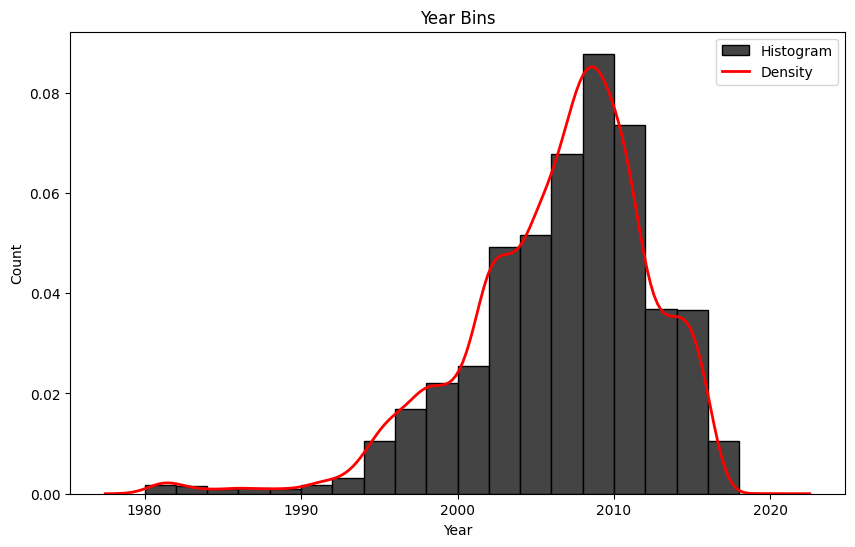

In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot

# Ustawienie wielkości wykresu
plt.pyplot.figure(figsize=(10, 6))

plt.pyplot.hist(df_main["Year"], bins=20, edgecolor="black", color="#444", density=True, label="Histogram")

plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Year Bins")
sns.kdeplot(df_main["Year"], color='red', linewidth=2, label='Density')
plt.pyplot.legend()

In [19]:
publishers4 = df_main[["Name", "Year"]]
publishers_grouped4 = publishers4.rename(columns={"Name": "Games"})
publishers_grouped4 = publishers_grouped4.groupby(["Year"], as_index=False).agg({"Games": "count"}).sort_values(["Games", "Year"], ascending=False).head(20)
publishers_grouped4

,Year,Games
29,2009.0,1431
28,2008.0,1428
30,2010.0,1257
27,2007.0,1201
31,2011.0,1136
26,2006.0,1008
25,2005.0,936
22,2002.0,829
23,2003.0,775
24,2004.0,744


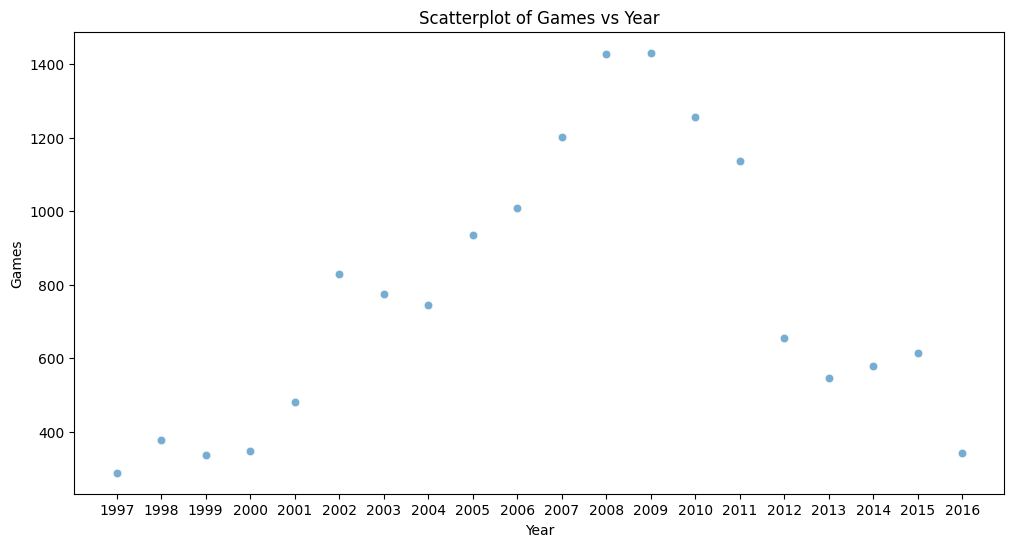

In [20]:
# Importowanie potrzebnych bibliotek
import matplotlib.pyplot as plt

# Konwersja kolumn na typ int
x = publishers_grouped4["Year"].astype(int)
y = publishers_grouped4["Games"].astype(int)

# Tworzenie wykresu rozrzutu
plt.figure(figsize=(12, 6))
plt.scatter(x, y, alpha=0.6, edgecolors='w', linewidth=0.5)

# Ustawienia osi x aby pokazywała lata jako liczby całkowite bez przecinków
plt.xticks(ticks=range(x.min(), x.max() + 1, 1))  # Skok co 1 rok na osi x

# Dodanie tytułów i etykiet
plt.title("Scatterplot of Games vs Year")
plt.xlabel("Year")
plt.ylabel("Games")

# Wyświetlenie wykresu
plt.show()
